<a href="https://colab.research.google.com/github/Jay101291/Healthcare-Data-New/blob/main/Forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# prompt: Install Pandas Matplotlib and prophet

!pip install pandas matplotlib prophet

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [10]:
df = pd.read_csv("/content/Google Analytics_data.csv")

In [11]:
df.head()

,Country,Browser,Landing page,Landing page + query string,Date,New users,Returning users,Total users,Active users,Engagement rate,Event count
0,India,Chrome,/,/,01/06/2025,42,5,48,48,0.916667,399
1,India,Chrome,/careers,/careers,01/06/2025,7,1,8,8,1.000000,39
2,India,Chrome,/blog/smart-traffic-control-using-iot,/blog/smart-traffic-control-using-iot,01/06/2025,5,0,5,5,1.000000,22
3,United States,Chrome,/blog/guide-to-power-virtual-agents,/blog/guide-to-power-virtual-agents,01/06/2025,4,0,5,5,0.600000,20
4,India,Chrome,/blog/festival-celebrations-then-and-now,/blog/festival-celebrations-then-and-now,01/06/2025,3,0,3,3,1.000000,16


In [12]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

In [13]:
df = df.set_index('Date')

In [14]:
df.head(20)

,Country,Browser,Landing page,Landing page + query string,New users,Returning users,Total users,Active users,Engagement rate,Event count
Date,,,,,,,,,,
2025-06-01,India,Chrome,/,/,42,5,48,48,0.916667,399
2025-06-01,India,Chrome,/careers,/careers,7,1,8,8,1.000000,39
2025-06-01,India,Chrome,/blog/smart-traffic-control-using-iot,/blog/smart-traffic-control-using-iot,5,0,5,5,1.000000,22
2025-06-01,United States,Chrome,/blog/guide-to-power-virtual-agents,/blog/guide-to-power-virtual-agents,4,0,5,5,0.600000,20
2025-06-01,India,Chrome,/blog/festival-celebrations-then-and-now,/blog/festival-celebrations-then-and-now,3,0,3,3,1.000000,16
2025-06-01,India,Safari,/,/,3,0,3,3,1.000000,13
2025-06-01,Pakistan,Chrome,/our-work/ml-based-healthcare-monitoring-system,/our-work/ml-based-healthcare-monitoring-system,3,0,3,3,1.000000,14
2025-06-01,United States,Chrome,/,/,3,0,3,3,1.000000,13
2025-06-01,India,Android Webview,/,/,2,0,2,2,0.500000,16


In [16]:
df.fillna(0, inplace=True)

In [17]:
print(df.head())

                  Country Browser                              Landing page  \
Date                                                                          
2025-06-01          India  Chrome                                         /   
2025-06-01          India  Chrome                                  /careers   
2025-06-01          India  Chrome     /blog/smart-traffic-control-using-iot   
2025-06-01  United States  Chrome       /blog/guide-to-power-virtual-agents   
2025-06-01          India  Chrome  /blog/festival-celebrations-then-and-now   

                         Landing page + query string  New users  \
Date                                                              
2025-06-01                                         /         42   
2025-06-01                                  /careers          7   
2025-06-01     /blog/smart-traffic-control-using-iot          5   
2025-06-01       /blog/guide-to-power-virtual-agents          4   
2025-06-01  /blog/festival-celebrations-then

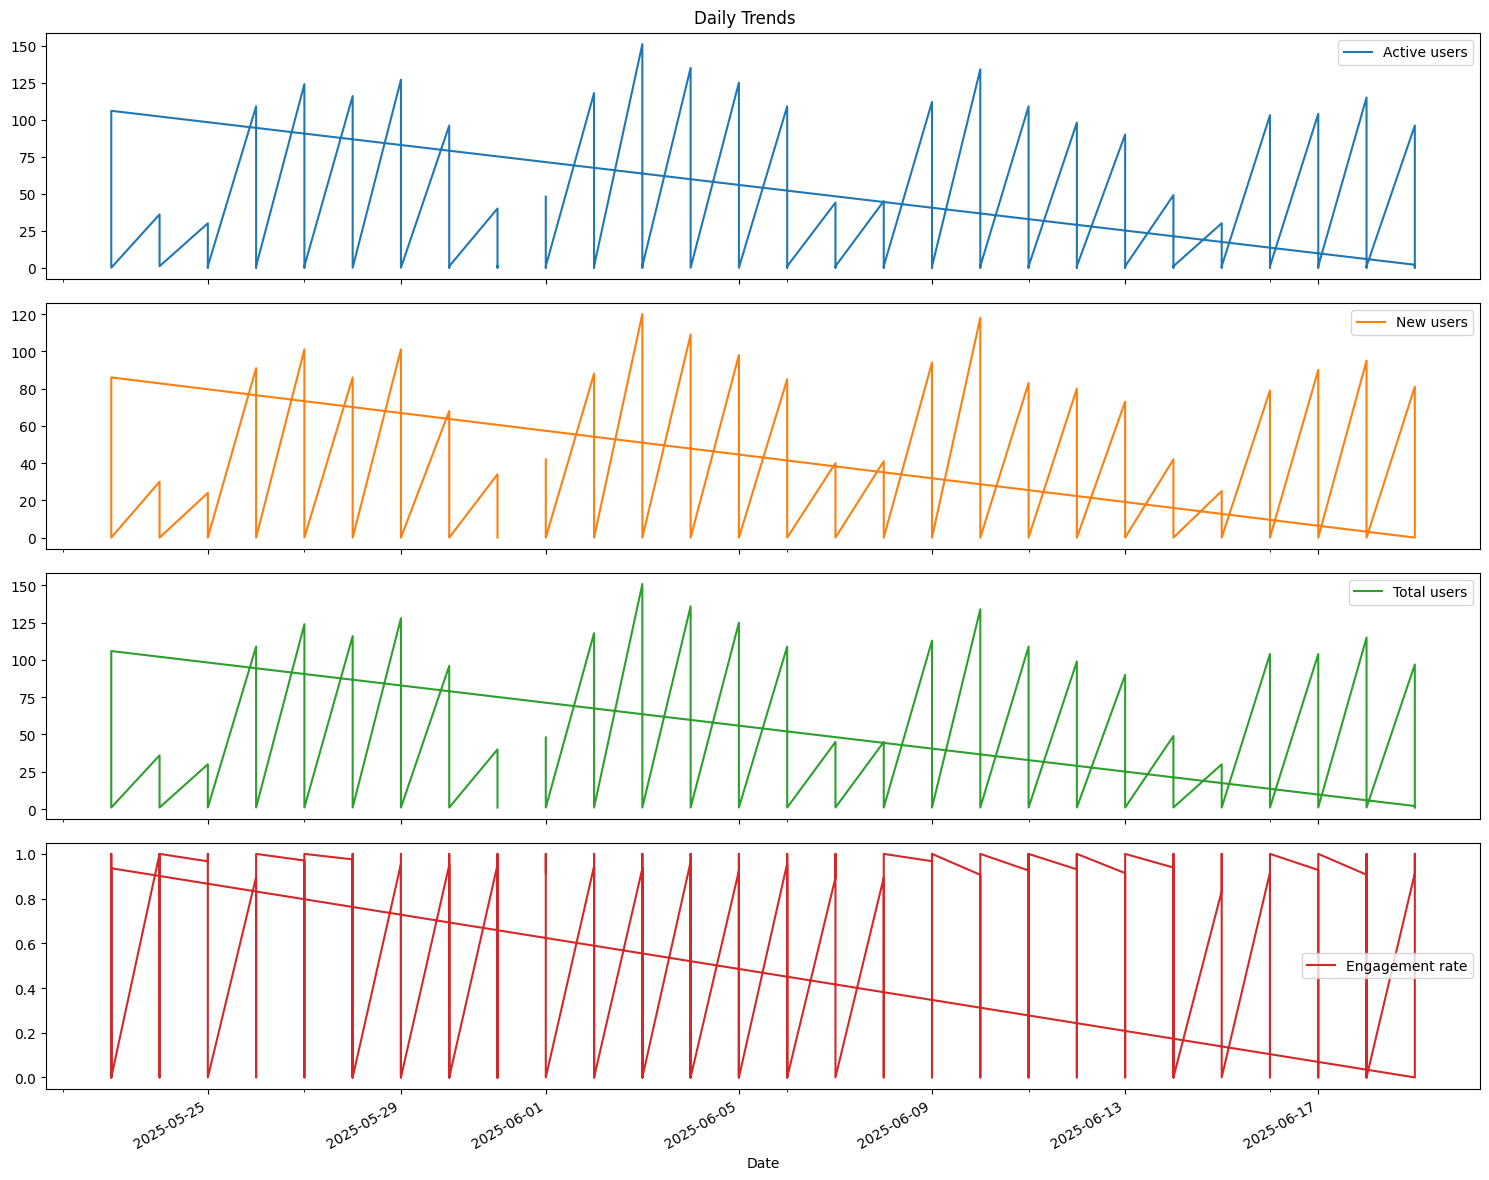

In [18]:
metrics = ['Active users', 'New users', 'Total users', 'Engagement rate']

df[metrics].plot(subplots=True, figsize=(15, 12), title="Daily Trends")
plt.tight_layout()
plt.show()

**bold text** Active Users Prediction

In [19]:
from prophet import Prophet

In [20]:
# Reset the index to make 'Date' a regular column if it's the index
if 'Date' not in df.columns and df.index.name == 'Date':
    df = df.reset_index()

# Convert 'Date' column to datetime objects with the correct format, coercing errors
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

# Prepare DataFrame for Prophet, dropping rows with NaT in 'Date' after conversion
df_prophet = df[['Date', 'Active users']].dropna(subset=['Date']).rename(columns={'Date': 'ds', 'Active users': 'y'})

display(df_prophet.head())

,ds,y
0,2025-06-01,48
1,2025-06-01,8
2,2025-06-01,5
3,2025-06-01,5
4,2025-06-01,3


In [21]:
model = Prophet()
model.fit(df_prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppeqehzn5/h5i49yix.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppeqehzn5/eul3x3nr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84718', 'data', 'file=/tmp/tmppeqehzn5/h5i49yix.json', 'init=/tmp/tmppeqehzn5/eul3x3nr.json', 'output', 'file=/tmp/tmppeqehzn5/prophet_model_atvvb_3/prophet_model-20250620091112.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:11:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:11:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [22]:
future = model.make_future_dataframe(periods=14)  # forecast next 14 days
forecast = model.predict(future)

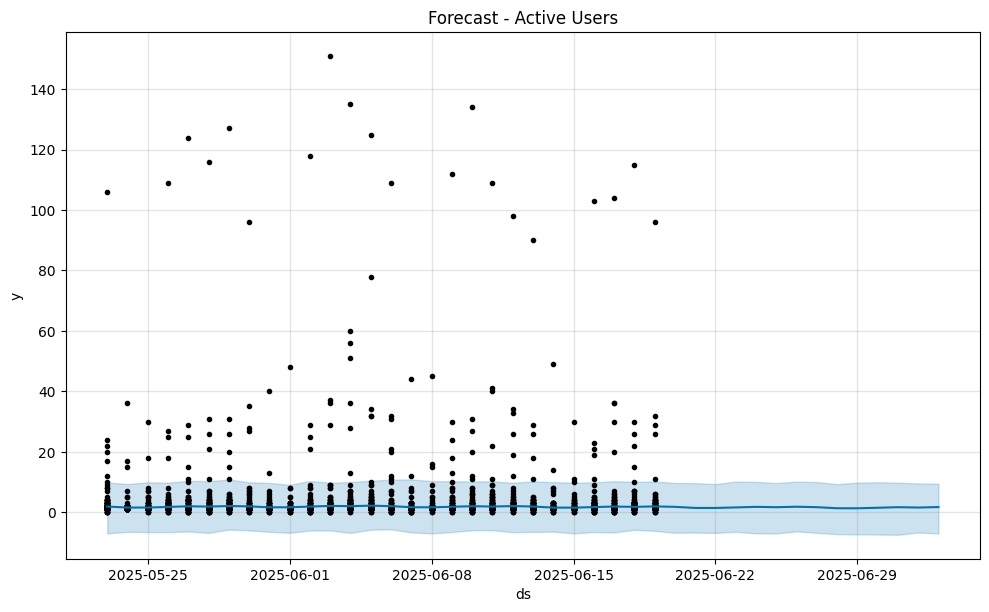

In [23]:
model.plot(forecast)
plt.title("Forecast - Active Users")
plt.show()

In [24]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
35,2025-06-27,1.676889,-6.825251,9.990422
36,2025-06-28,1.320057,-7.243945,9.312133
37,2025-06-29,1.307511,-7.309378,9.816359
38,2025-06-30,1.484569,-7.371279,9.926256
39,2025-07-01,1.672392,-7.459047,9.783983
40,2025-07-02,1.558639,-6.719145,9.555629
41,2025-07-03,1.714803,-7.039107,9.434916


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppeqehzn5/t5cdlwlc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppeqehzn5/3iq7wd6w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21250', 'data', 'file=/tmp/tmppeqehzn5/t5cdlwlc.json', 'init=/tmp/tmppeqehzn5/3iq7wd6w.json', 'output', 'file=/tmp/tmppeqehzn5/prophet_modelr2xkvmem/prophet_model-20250620091137.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:11:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:11:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Predictions for the upcoming 7 days:


,ds,yhat,yhat_lower,yhat_upper
28,2025-06-20,1.784835,-6.004860,10.811829
29,2025-06-21,1.428003,-6.822981,9.848811
30,2025-06-22,1.415457,-6.302729,8.780656
31,2025-06-23,1.592515,-6.005150,10.151351
32,2025-06-24,1.780338,-6.331619,10.174296
33,2025-06-25,1.666585,-6.774264,8.770901
34,2025-06-26,1.822749,-6.219081,10.340222


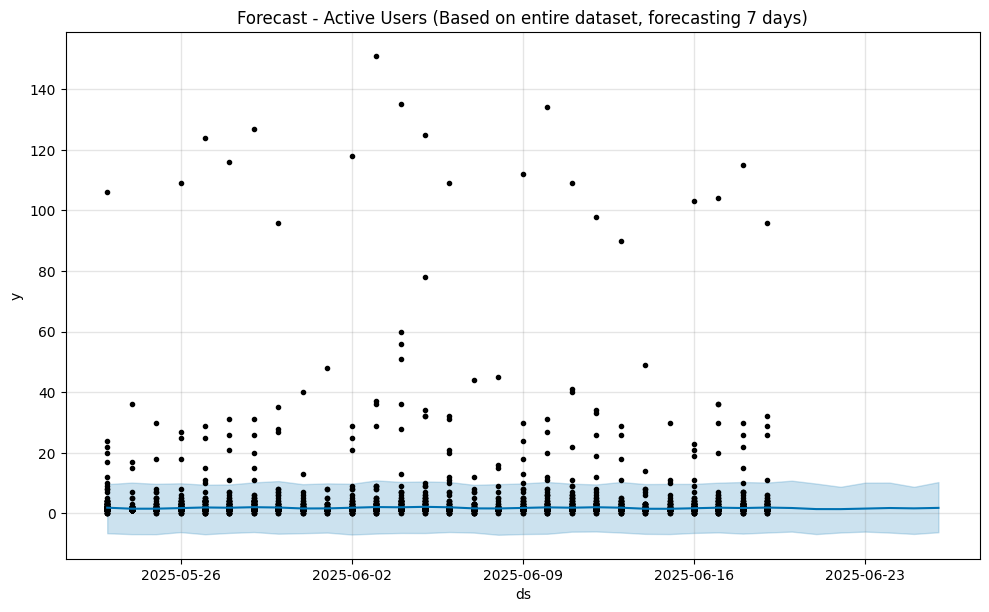

In [25]:
# prompt: Take past 7 days data and predecit Active user for upcoming 7 days

# Using the entire df_prophet for training as Prophet requires more data
# Select the past 7 days of data is not sufficient for Prophet
# past_7_days_df = df_prophet.tail(7)

# Initialize and fit the model with the entire dataset
model_7_days = Prophet()
model_7_days.fit(df_prophet)

# Create a future dataframe for the next 7 days
future_7_days = model_7_days.make_future_dataframe(periods=7)

# Predict the active users for the next 7 days
print("Predictions for the upcoming 7 days:")
forecast_7_days = model_7_days.predict(future_7_days)

# Display the predictions for the next 7 days (tail will show the future predictions)
display(forecast_7_days[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7))

# Optional: Plot the forecast based on the past 7 days data
model_7_days.plot(forecast_7_days)
plt.title("Forecast - Active Users (Based on entire dataset, forecasting 7 days)")
plt.show()

In [26]:
# prompt: give me model score

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# To calculate the score, we need actual values for the forecast period.
# Let's assume we have actual data available for the forecast period (the last 7 days of the df_prophet).
# If we were to evaluate the model on a test set, we would split df_prophet into training and testing.

# For demonstration purposes, let's evaluate the model's performance on the training data itself
# to see how well it fits the historical data. This is NOT a true measure of generalization.
# A proper evaluation requires a separate test set with actual values for the forecast period.

# Merge actual values with the forecast
evaluation_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df_prophet.set_index('ds')['y']).reset_index()

# Drop rows where actual values are not available (future predictions)
evaluation_df = evaluation_df.dropna()

# Calculate metrics
mae = mean_absolute_error(evaluation_df['y'], evaluation_df['yhat'])
rmse = np.sqrt(mean_squared_error(evaluation_df['y'], evaluation_df['yhat']))

print(f"Model Evaluation on Training Data:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Note: These scores reflect the model's fit on historical data, not its predictive power on future unseen data.
# For a proper evaluation, you would split your data into training and testing sets *before* fitting the model.

Model Evaluation on Training Data:
Mean Absolute Error (MAE): 1.469586972859542
Root Mean Squared Error (RMSE): 6.448201177304875


In [32]:
# prompt: I want to predict Engagement rate in a way that if someone type country and date then it will show result specific country predection

from ipywidgets import Dropdown, DatePicker, Output, VBox
from IPython.display import display
from datetime import datetime
import pandas as pd
import logging

# Assuming df is already loaded and processed as in the preceding code
# Make sure df has 'Date', 'Country', and 'Engagement rate' columns

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Get unique countries from the DataFrame
available_countries = df['Country'].unique().tolist()
available_countries.sort() # Optional: sort countries alphabetically

# Create widgets
country_dropdown = Dropdown(options=available_countries, description='Country:')
date_picker = DatePicker(description='Select Date:', disabled=False)
output_widget = Output()

# Function to update output based on selections
def update_prediction(change):
    with output_widget:
        output_widget.clear_output()
        selected_country = country_dropdown.value
        selected_date = date_picker.value

        if selected_country and selected_date:
            # Convert selected_date to pandas Timestamp for comparison
            selected_date_ts = pd.Timestamp(selected_date)

            # Filter data for the selected country up to the selected date
            country_df = df[(df['Country'] == selected_country) & (df['Date'] <= selected_date_ts)].copy()

            if not country_df.empty:
                # Prepare data for Prophet
                prophet_df = country_df[['Date', 'Engagement rate']].rename(columns={'Date': 'ds', 'Engagement rate': 'y'})

                # Ensure 'y' is numeric
                prophet_df['y'] = pd.to_numeric(prophet_df['y'], errors='coerce').fillna(0)

                # Fit Prophet model
                # Suppress Prophet's output if not needed for display
                logging.getLogger('cmdstanpy').setLevel(logging.ERROR)

                model = Prophet()
                model.fit(prophet_df)

                # Create future dataframe for the selected date
                future = pd.DataFrame({'ds': [selected_date_ts]})

                # Make prediction
                forecast = model.predict(future)

                # Display the predicted engagement rate
                if not forecast.empty:
                    predicted_engagement_rate = forecast.loc[0, 'yhat']
                    print(f"Predicted Engagement Rate for {selected_country} on {selected_date.strftime('%Y-%m-%d')}: {predicted_engagement_rate:.4f}")
                else:
                    print("Could not make a prediction for the selected date.")

            else:
                print(f"No data available for {selected_country} up to the selected date.")
        else:
            print("Please select a country and a date.")

# Link widgets to the update function
country_dropdown.observe(update_prediction, names='value')
date_picker.observe(update_prediction, names='value')

# Display widgets
display(VBox([country_dropdown, date_picker, output_widget]))

In [33]:
# prompt: Above we have doen date wise engagement rate prediction now i want week wise predection I want front end type UI where user Add  date range and they will get predection

# Aggregate data to weekly frequency
df_weekly = df.set_index('Date').resample('W')['Engagement rate'].mean().reset_index()
df_weekly = df_weekly.dropna(subset=['Engagement rate']) # Drop rows with no data for the week
df_weekly = df_weekly.rename(columns={'Date': 'ds', 'Engagement rate': 'y'})

# Ensure 'y' is numeric
df_weekly['y'] = pd.to_numeric(df_weekly['y'], errors='coerce').fillna(0)

# Create widgets for date range selection
start_date_picker = DatePicker(description='Start Date:', disabled=False)
end_date_picker = DatePicker(description='End Date:', disabled=False)
weekly_output_widget = Output()

# Function to update weekly prediction based on date range
def update_weekly_prediction(change):
    with weekly_output_widget:
        weekly_output_widget.clear_output()
        start_date = start_date_picker.value
        end_date = end_date_picker.value

        if start_date and end_date:
            if start_date > end_date:
                print("Start date cannot be after end date.")
                return

            # Fit Prophet model on weekly data
            import logging
            logging.getLogger('cmdstanpy').setLevel(logging.ERROR)
            weekly_model = Prophet()
            weekly_model.fit(df_weekly)

            # Create future dataframe for the selected date range (weekly)
            future_dates = pd.date_range(start=start_date, end=end_date, freq='W')
            future_weekly_df = pd.DataFrame({'ds': future_dates})

            if not future_weekly_df.empty:
                # Make predictions for the future weekly dates
                weekly_forecast = weekly_model.predict(future_weekly_df)

                # Display the predicted weekly engagement rates
                print("Predicted Weekly Engagement Rates:")
                display(weekly_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

                # Optional: Plot the weekly forecast for the selected range
                fig = weekly_model.plot(weekly_forecast)
                plt.title("Weekly Forecast - Engagement Rate (Selected Date Range)")
                plt.xlim([start_date, end_date]) # Set plot limits to the selected range
                plt.show()

            else:
                 print("No future weekly dates within the selected range.")

        else:
            print("Please select both start and end dates.")

# Link widgets to the update function
start_date_picker.observe(update_weekly_prediction, names='value')
end_date_picker.observe(update_weekly_prediction, names='value')

# Display widgets
print("Weekly Engagement Rate Prediction:")
display(VBox([start_date_picker, end_date_picker, weekly_output_widget]))

Weekly Engagement Rate Prediction:
